# Exploratory analysis of ParkinsonsUK_tweets.csv 

In [103]:
import pandas as pd
import datetime
tweets_dataframe = pd.read_csv("ParkinsonsUK_tweets.csv")
num_rows=tweets_dataframe.shape[0]
num_cols=tweets_dataframe.shape[1]
print'Number of rows= ',num_rows
print'Number of columns= ',num_cols
columns_names=list(tweets_dataframe.columns.values)
print'columns names= ',columns_names
print '--------columns data_types:'
print(tweets_dataframe.dtypes)
#tweets_dataframe=tweets_dataframe.dropna()
#tweets_dataframe.hist('month',bins=10)

Number of rows=  3240
Number of columns=  10
columns names=  ['screen_name', 'name', 'twitter_id', 'description', 'year', 'month', 'date', 'time', 'tweet_id', 'tweet']
--------columns data_types:
screen_name     object
name            object
twitter_id     float64
description     object
year           float64
month          float64
date           float64
time           float64
tweet_id       float64
tweet           object
dtype: object


## Interval of time in the dataset

In [104]:
import datetime
year_aus=int(tweets_dataframe['year'][num_rows-1])
month_aus=int(tweets_dataframe['month'][num_rows-1])
day_aus=int(tweets_dataframe['date'][num_rows-1])
hour_aus=int(tweets_dataframe['time'][num_rows-1])
first_date=datetime.datetime(year =year_aus , month = month_aus, day =day_aus,hour=hour_aus)
year_aus=int(tweets_dataframe['year'][0])
month_aus=int(tweets_dataframe['month'][0])
day_aus=int(tweets_dataframe['date'][0])
hour_aus=int(tweets_dataframe['time'][0])
last_date=datetime.datetime(year =year_aus , month = month_aus, day =day_aus,hour=hour_aus)
print 'first_date=',first_date
print 'last_date=', last_date

first_date= 2016-01-29 16:00:00
last_date= 2016-10-18 08:00:00


## Number of tweets per interval of time

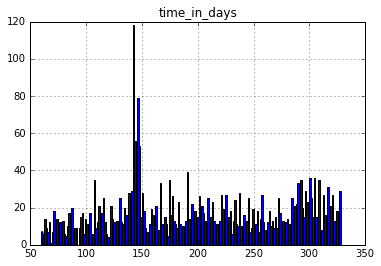

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
#ax1 = fig.add_subplot(1,2,1)
time_in_days=tweets_dataframe['date']+tweets_dataframe['month']*31
tweets_dataframe['time_in_days']=time_in_days 
ax1=tweets_dataframe.hist('time_in_days',bins=200)
plt.show()

## Divide the three categories of tweet

In [106]:
tweets_dataframe=tweets_dataframe.dropna()
tweets_RT=tweets_dataframe[tweets_dataframe["tweet"].str.contains('^RT')]
tweets_at=tweets_dataframe[tweets_dataframe["tweet"].str.contains('^@')]
tweets_gen=tweets_dataframe[tweets_dataframe["tweet"].str.contains('^(?!RT)')]
tweets_gen=tweets_gen[tweets_gen["tweet"].str.contains('^(?!@)')]
print 'kind of tweets , number of rows:'
print 'tweets_RT        ',tweets_RT.shape[0]
print 'tweets_@         ',tweets_at.shape[0]
print 'other tweets     ',tweets_gen.shape[0]

kind of tweets , number of rows:
tweets_RT         947
tweets_@          1192
other tweets      1092


## Number of tweets_RT per interval of time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD36358>]], dtype=object)

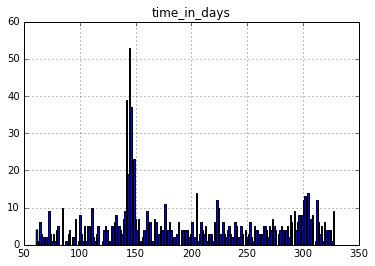

In [107]:
tweets_RT.hist('time_in_days',bins=200)

## Number of tweets@ per interval of time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC4AEB8>]], dtype=object)

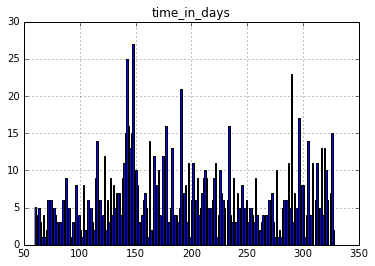

In [108]:
tweets_at.hist('time_in_days',bins=200)

## Number of tweets_generic per interval of time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CEB0470>]], dtype=object)

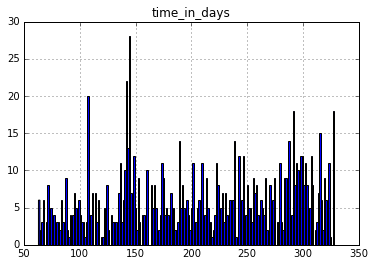

In [109]:
tweets_gen.hist('time_in_days',bins=200)

## module for Tokenize tweet, extract address and count most frequent addres

In [118]:
import re
import numpy as np
def tokenizize_text(data_frame,column_name):
    tokenized_dataframe=[]
    for item in data_frame[column_name]:
        tokenized_dataframe.append(item.split(" "))
    return tokenized_dataframe
tokenized_tweets=tokenizize_text(tweets_dataframe,'tweet')
# find most frequent users
def extract_word(text_lists,word):
    full_list=[]
    for item in text_lists:
        tokens=[]
        for token in item:
            if re.search(word, token) is not None:
                tokens.append(token)
        if len(tokens)>0:
            full_list.append(tokens)
    return full_list
address_list=extract_word(tokenized_tweets,"@")
print(len(address_list))
def clean_text(text):
    punctuation = [",", ":", ";", ".", \
'"', "?", "/", "-", "+", "&", "(", ")"]
    clean_tokenized = []
    for item in text:
        tokens = []
        for token in item:
            token = token.lower()
            for punc in punctuation:
                token = token.replace(punc, "")
                tokens.append(token)
        clean_tokenized.append(tokens)
    return clean_tokenized
#------------------------------------------------
def count_word(data_frame):
    tokenized_tweet=tokenizize_text(data_frame,'tweet')
    clean_tokenized=clean_text(tokenized_tweet)
    address=extract_word(clean_tokenized,"@")
    unique_tokens = []
    single_tokens = []
    for tokens in address:
        for token in tokens:
            if token not in single_tokens:
                single_tokens.append(token)
            elif token in single_tokens and token not in unique_tokens:
                unique_tokens.append(token)
    counts = pd.DataFrame(0, index=np.arange\
    (len(clean_tokenized)), columns=unique_tokens)
    #--------------------------------------------
    for i, item in enumerate(address):
       for token in item:
            if token in unique_tokens:
                counts.iloc[i][token] += 1
#    #--------------------------------------
    word_counts = counts.sum(axis=0)
    word_counts=word_counts.sort_values(ascending=False)
    return word_counts

2538


### More frequent addres in tweets_RT

In [120]:
print count_word(tweets_RT)[0:10]

@parkinsonsuk       7176
@parkinsonsworm      741
@daveclarktv         506
@burgessimo          396
@pjacksonclark       365
@parkinsonsukne      330
@stevegford          294
@pedalparkinsons     280
@parkinsons52        266
@officialpdc         208
dtype: int64


### More frequent addres in tweets@

In [116]:
count_word(tweets_at)[0:10]

@justgiving              372
@3peaks2016              132
@2016pilgrimage          108
@jldowsett               108
@bignige1962              96
@eagleradiokim            84
@nightriderbike           84
@wwb24e                   84
hello@parkinsonsorguk     81
@chrisconway              72
dtype: int64


More frequent addres in tweets gen

In [122]:
count_word(tweets_gen)[0]

@daveclarktv                               276
@ngsopengardens                            192
@stevegford                                168
@officialpdc                               156
@oxotowerwharf                             132
@bbcbreakfast                               96
@parkinsons52                               96
@comedystoreuk                              93
@bbc5live                                   84
@mickferry                                  84
@pjacksonclark                              84
@deeringrob                                 72
@comedystoremcr                             72
@prescriptioncc                             72
@bbctwo                                     67
@michaeljfoxorg                             60
@fitzwilliamcoll                            60
@jasonmanford                               48
@giveasyoulive                              48
@spookysprint                               48
@nhsengland                                 48
@dyingmatters